In [6]:
# libraries
import pandas as pd
df = pd.read_csv('/Users/macarthurbeggs/Downloads/PSTAT 100/WaveData.csv')

# Analysis of the Southern California Coastline's Ocean Data

Tingting Liang, Mac Beggs, Apollo Hodges 

#### Author contributions

Mac will work on the exploratory analysis, explore variable distributions and relationships between variables through visual and descriptive summaries.
Apollo will work on the focused analysis, ploting time series and fitting ARIMA model.
Tingting will focus on the analyzing and summarizing the results.

#### Abstract

Prepare an abstract *after* you've written the entire report. The abstract should be 4-6 sentences summarizing the report contents. Typically:
* the first 1-2 sentences introduce and motivate the topic;
* the next 1-2 sentences state the aims;
* the next 1-2 sentences state the findings.

For this project, we are exploring...

---
## Introduction

### Background

Living less than a mile away from the great Pacific Ocean, we were interested in how the water and waves differ along the coast of California.  We will use the National Oceanic and Atmospheric Administration (NOAA)'s Standard meterological data taken from the National Data Buoy Centers at three locations, East Santa Barbara basin, Santa Monica basin and San Diego basin. The dataset contains basic information about surface waves and ocean wind. We will explore the difference in the waves and wind from these three locations along the coast and analyze what may cause those differences. The locations are mark on the map below: 

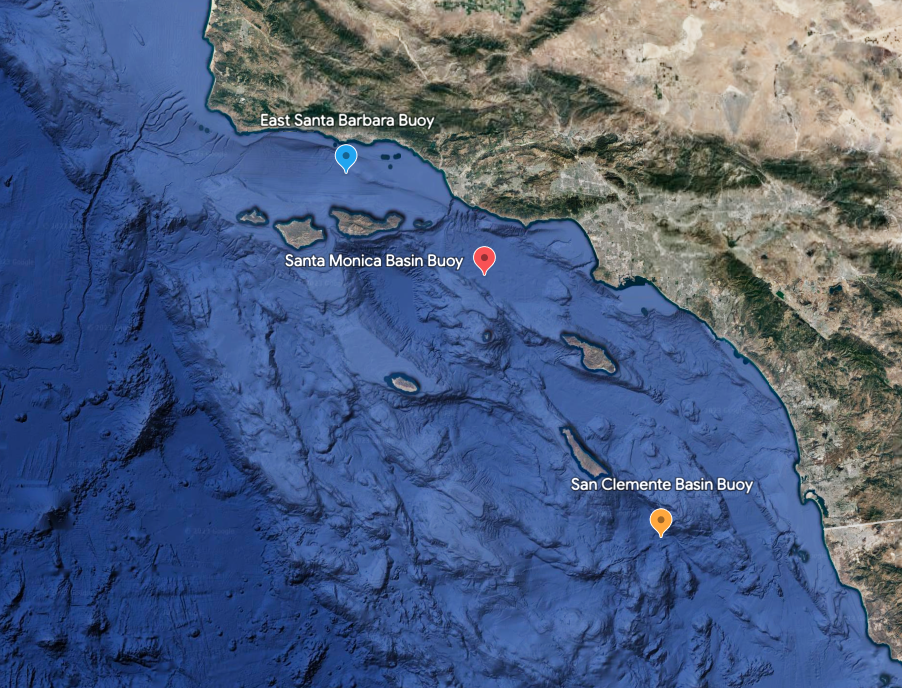

### Aims

The aims of this project is the find the differences of ocean wind and surface wave data among East Santa Barbara, Santa Monica basin and San Clemente basin. In particular, we would like to explore any differences in the locations during certain seasons or times. Furthermore, we would like to find out if these locations receive swells and/or winds from the different directions. We are interested to learn if there is any correlation between wind direction and wind speed. We are also curious to find any correlation between swell height or swell period and swell direction.

Because waves are created by strong winds blowing over large areas in the ocean, we predict that wind speed will be a strong factor in predicting wave height. We also predict that the San Clemente Buoy will yeild strong winds and stronger swells than the East Santa Barbara and Santa Monica Basin buoys, because it is more exposed to the ocean's storms, whereas the Santa Barbara and Santa Monica buoys are more protected by the Channel Islands. We also predict that the East Santa Barbara buoy will not capture any swells from the south, because Santa Cruz Island, San Miguel Island, and Santa Rosa Island are directly beneath the buoy, which would block any swell coming up from the south. We also predict that the Santa Monica Basin buoy will not capture any swells from the west, because the same chain of islands that are blocking the Santa Barbara buoy from the south are directly west of the buoy.

---
## Materials and methods


### Datasets


The data is collected by the National Ocean and Atmospheric Administration (NOAA)'s National Data Buoy Center. The Santa Monica Basin data is from Station 46025 located at 33.755 N 119.045 W (https://www.ndbc.noaa.gov/station_history.php?station=46025). The East
Santa Barbara data is from Station 46053 located at 34.241 N 119.839 W
(https://www.ndbc.noaa.gov/station_page.php?station=46053). The San Diego Basin data is from Station 46086 located at 32.499 N 118.052 W (https://www.ndbc.noaa.gov/station_history.php?station=46086). We merged the three datasets into one and tidied it into a dataset called `df`.

The data was taken from an ocean buoy that averages and reports its observations over various time frames; the majority of the data is reported hourly or every 20 minutes.
* The **observational unit** is _**Location**_.  
* The **variables** are _**#YY, MM, DD, hh, mm, WDIR, GST, WVHT, DPD, APD, MWD, PRES, ATMP, WTMP**_. 

The table below provides variable descriptions and units for each column in the dataframe.

Name | Variable description | Type | Units of measurement
---|---|---|---
Location | Location the data is collected (East Santa Barbara or Santa Monica Basin) | Categorical | None
#YY| Year| Numeric| Year
MM | Month | Numeric | Month
DD | Day | Numeric | Day
hh | Hour | Numeric | hour
mm | Minute | Numeric | minute
WDIR | Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.| Numeric | degT
WSPD | Wind speed averaged over an eight-minute period for buoys and a two-minute period for land stations. | Numeric | m/s
GST | Peak 5 or 8 second gust speed measured during the eight-minute or two-minute period. | Numeric | m/s
WVHT | Significant wave height is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period. | Numeric | meters
DPD | Dominant wave period is the period with the maximum wave energy. | Numeric | sec
APD | Average wave period of all waves during the 20-minute period. | Numeric | sec
MWD | The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as zero degrees and East as 90 degrees. | Numeric | degT
PRES | Sea level pressure | Numeric | hPa
ATMP | Air temperature | Numeric | degC
WTMP | Sea surface temperature | Numeric | degC

The first few rows of the data are shown below: 

In [4]:
df = pd.read_csv('tidy-data.csv')
df.head()

,Location,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP
0,East Santa Barbara,2022.0,1.0,1.0,0.0,40.0,269.0,10.2,12.7,1.91,7.14,5.12,266.0,1007.4,12.9,13.3
1,East Santa Barbara,2022.0,1.0,1.0,1.0,40.0,292.0,14.8,18.4,2.07,6.67,5.19,249.0,1006.7,12.7,13.3
2,East Santa Barbara,2022.0,1.0,1.0,2.0,40.0,274.0,11.1,14.0,2.02,7.14,5.37,261.0,1008.4,12.4,13.3
3,East Santa Barbara,2022.0,1.0,1.0,3.0,40.0,297.0,11.4,14.6,2.24,6.25,5.45,265.0,1009.1,12.4,13.3
4,East Santa Barbara,2022.0,1.0,1.0,4.0,40.0,291.0,10.1,14.4,2.13,9.09,5.58,254.0,1009.4,12.3,13.3


### Methods
To analyze the data, we group the data by hour and find the average it to find how the wind direction and wind speed differ across certain time. We will also graph correlations across variables. We will use time series to see what factors affect certain variables. We will also fit our data into an ARIMA model.

To find out how swells and winds differ among the three locations, we first grouped the data by months. Then for each month we took the mean of all variables at each hour. We plotted the hour's mean of each variable over 24 hours, giving us what an average day at each buoy looks like in a particular month.

---
## Results

This section should show your results. You can include sub-header structure as suits your aims (or not).

The easiest way to compose this section is to structure it around your figures and tables. Prepare and input your figures and tables in the order you'd like them to appear, and then draft the text. Move through the figures and tables in sequence, and for each one:
* introduce the figure/table;
* describe what it shows; 
* and then describe what you see (its significance). 
Keep the latter brief; you'll have an opportunity to offer more nuanced/extended commentary in the discussion section.


### Dominant Swell Periods (top) & Directions (bottom)

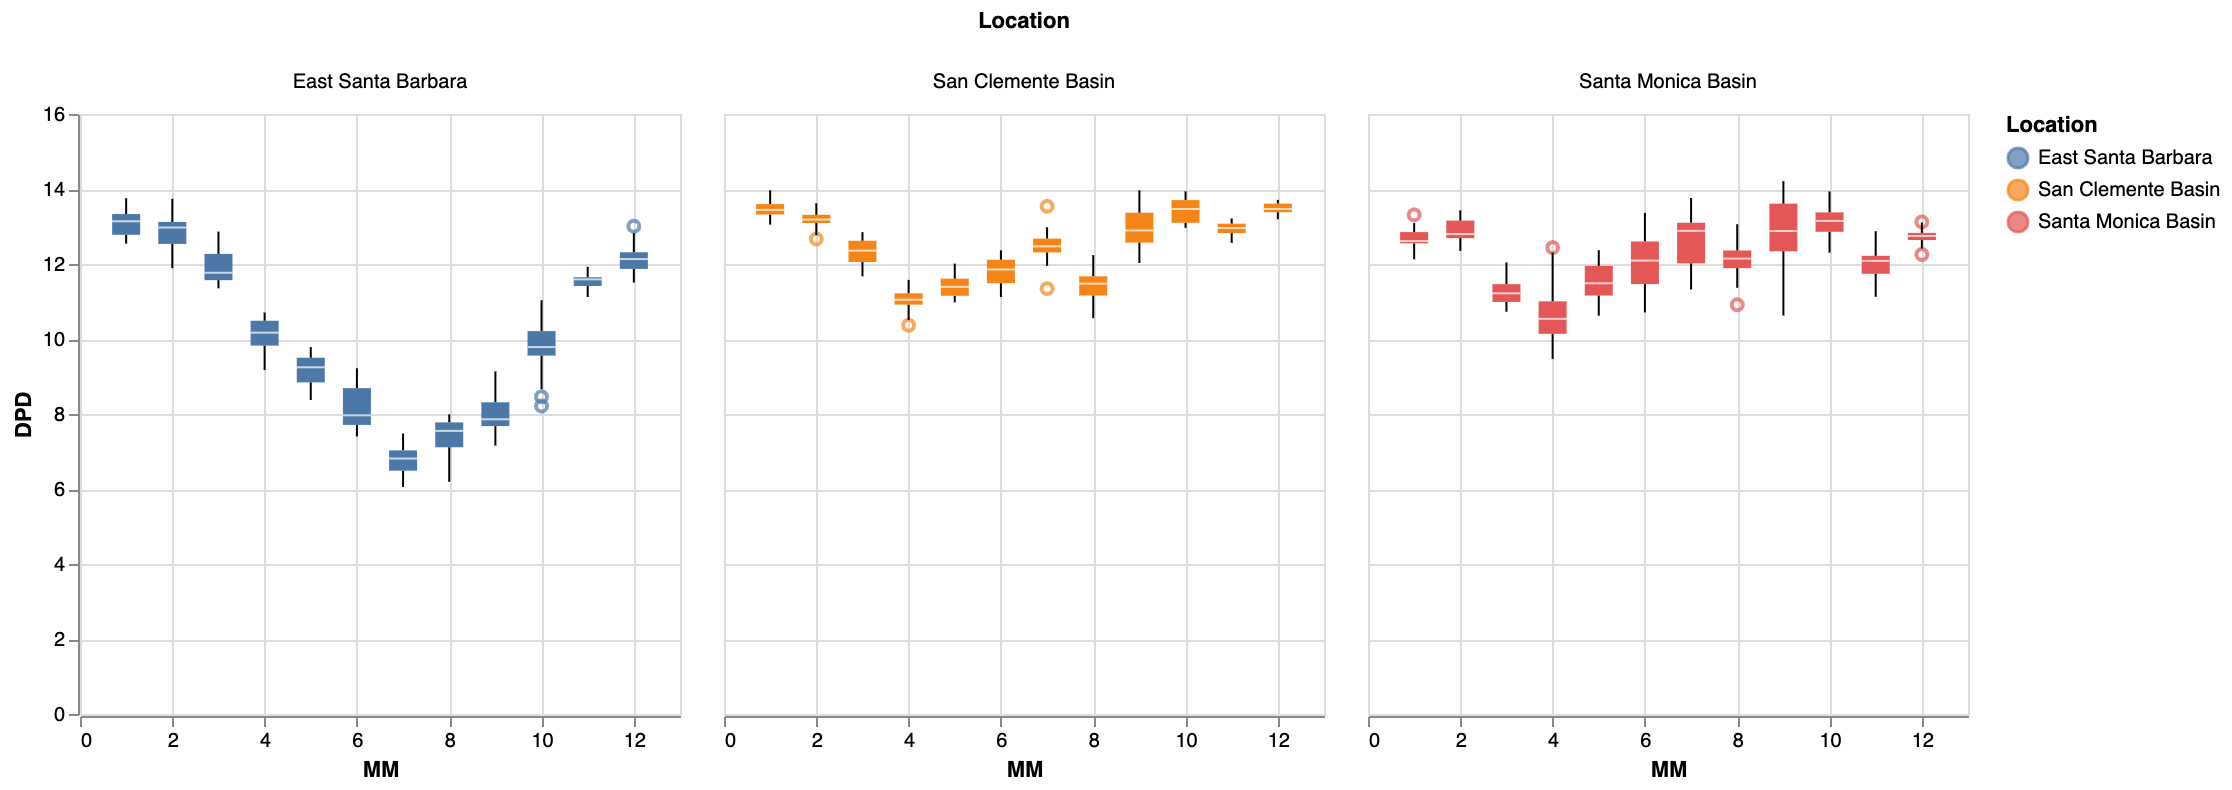

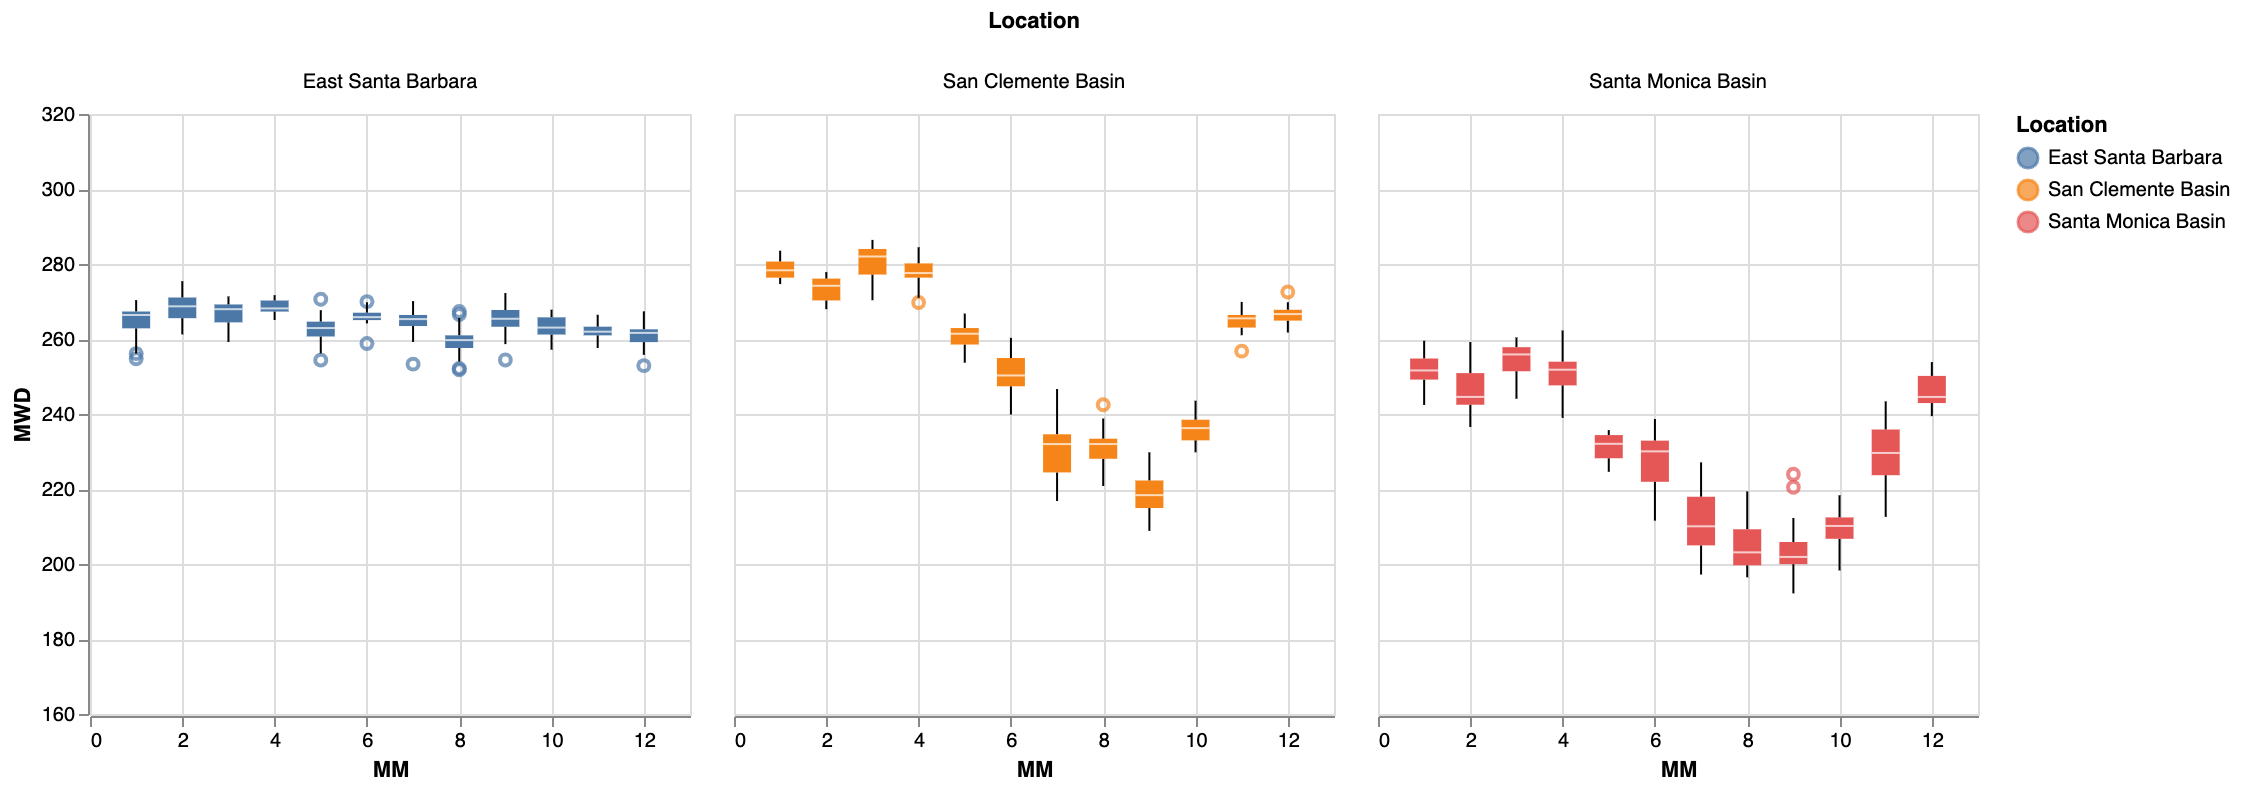

### Correlation Plot
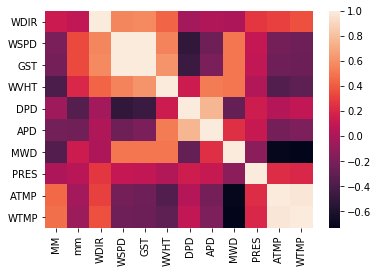

### Wind Speed vs Average Wave Period
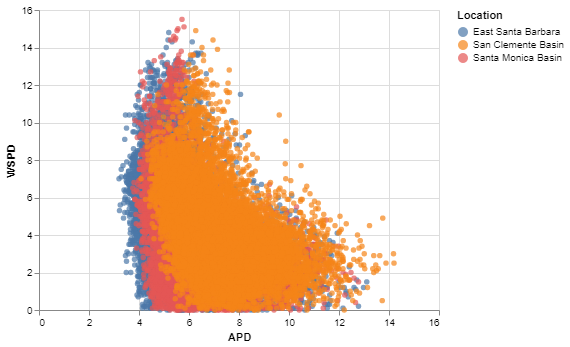

---
## Discussion

This section should conclude your report in 1-2 paragraphs that reiterate the findings and offer any commentary. 'Commentary' could include:
* speculation about the cause of certain findings;
* caveats about interpretation;
* refining of questions or aims;
* further topics you would have liked to explore.

In our exploratory data analysis, we were pleased to find out that at the San Clemente Basin and Santa Monica Basin swells came from different directions at different times of the year. During the fall and winter months the most energetic swells came primarily from the west, and in the Spring and Summer months the most energetic swells came primarily from the south southwest. As we expected, this was not the case for the East Santa Barbara buoy. Santa Barbara only received swells from the west the entire year. Therefore, our prediction that the East Santa Barbara buoy would not receive any swells from the south was correct! This brings us to the difference in the swells that the locations received. In the winter all three locations got their most dominant swells from the west. However, in the summer, the San Clemente Basin and Santa Monica Basin received its strongest swells from the south, while the southern hemisphere was in winter. During the summer, East Santa Barbara got its strongest swells from the west. The swell periods Santa Barbara received from the west were those it got from the west during the winter. In conclusion, the seasons do have a profound effect on the ocean waves at these three locations. Though, to our surprise the Santa Monica Basin buoy did receive swells from the west. When comparing the swells the Santa Monica Basin saw from the west to the other buoys' west swells, you can observe that the west swells at the Santa Monica buoy came at a slightly lower angle south. This slightly lower angle may be due to the chain of islands directly west of the buoy we cited in the "Aims". On the other hand, the San Clemente Basin experienced slightly higher angeled west swells than the other two buoys. This also may be due to the buoy's position to the Channel Islands. The buoy is less protected by the Channel Islands. The buoy is also less wedged in the curvature of Southern California's coastline. 

We also looked at the correlations between the variables of our dataset. We noticed a particularly interesting trend between the Wind Speed vs Average Wave Period, and decided to dig deeper. Looking at high Wind Speeds (>10 m/s), we noticed that there is a positive correlation between it and Average Wave Period, despite the total correlation being negative. As wind speed decreses, the correlation between it and Average Wave Period does as well. Therefore, we can conclude that while higher Wind Speeds generally mean lower Average Wave Periods, extremely high Wind Speeds rebound and increase the Wave Period. This could be due to choppy or stormy seas distupting longer period swells in the water. The longer period swells seen at lower wind speeds would also support this hypothesis.
